In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/sample_data/raw_analyst_ratings.csv")
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


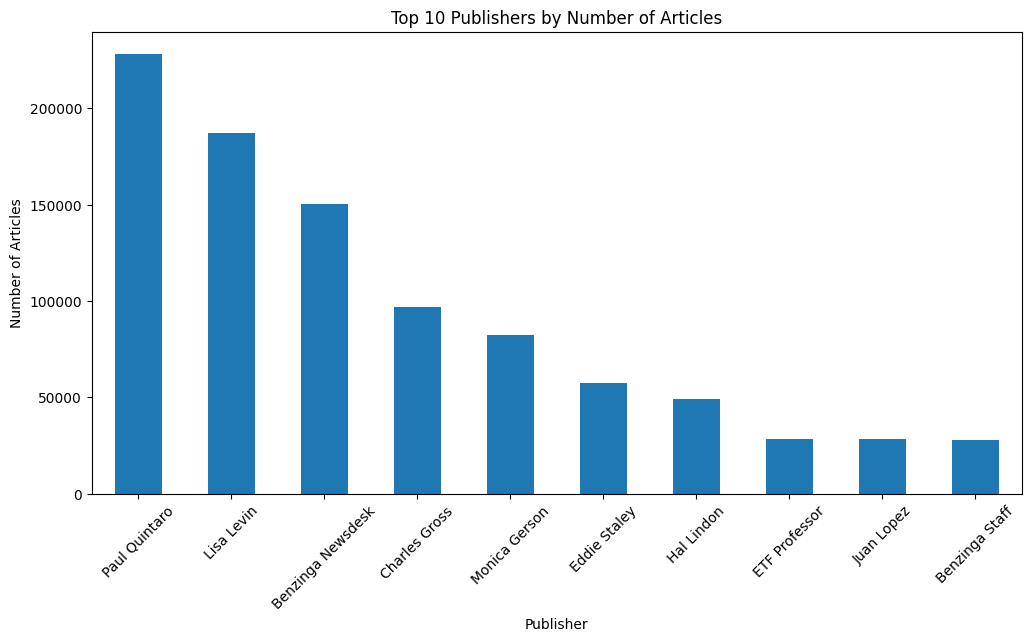

In [8]:
# Count the number of articles by each publisher
publisher_counts = df['publisher'].value_counts()

# Display the top 10 publishers
print(publisher_counts.head(10))

# Plot the top publishers
import matplotlib.pyplot as plt

publisher_counts.head(10).plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Select the top publishers for analysis
top_publishers = publisher_counts.head(5).index
df_top_publishers = df[df['publisher'].isin(top_publishers)]

# Vectorize the headlines
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_top_publishers['headline'])

# Convert to a DataFrame for easier analysis
keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keywords['publisher'] = df_top_publishers['publisher'].values

# Summarize the most frequent words for each publisher
publisher_keywords = keywords.groupby('publisher').sum().T

# Display top keywords for the top publishers
for publisher in top_publishers:
    print(f"Top keywords for {publisher}:")
    print(publisher_keywords[publisher_keywords[publisher] > 0][publisher].sort_values(ascending=False).head(10))
    print()
